<a href="https://colab.research.google.com/github/springboardmentor2507-alt/AI-Powered-NIDS/blob/Srinivasu-Botta/SentinelNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("KDDTrain+.txt")
df.head().T


,0,1,2,3,4
0,0,0,0,0,0
tcp,udp,tcp,tcp,tcp,tcp
ftp_data,other,private,http,http,private
SF,SF,S0,SF,SF,REJ
491,146,0,232,199,0
0.1,0,0,8153,420,0
0.2,0,0,0,0,0
0.3,0,0,0,0,0
0.4,0,0,0,0,0
0.5,0,0,0,0,0


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76034 entries, 0 to 76033
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         76034 non-null  int64  
 1   tcp       76034 non-null  object 
 2   ftp_data  76034 non-null  object 
 3   SF        76034 non-null  object 
 4   491       76034 non-null  int64  
 5   0.1       76034 non-null  int64  
 6   0.2       76034 non-null  int64  
 7   0.3       76034 non-null  int64  
 8   0.4       76034 non-null  int64  
 9   0.5       76034 non-null  int64  
 10  0.6       76034 non-null  int64  
 11  0.7       76034 non-null  int64  
 12  0.8       76034 non-null  int64  
 13  0.9       76034 non-null  int64  
 14  0.10      76034 non-null  int64  
 15  0.11      76034 non-null  int64  
 16  0.12      76034 non-null  int64  
 17  0.13      76034 non-null  int64  
 18  0.14      76034 non-null  int64  
 19  0.15      76034 non-null  int64  
 20  0.16      76034 non-null  in

In [4]:
df.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20
count,76034.000000,7.603400e+04,7.603400e+04,76034.000000,76034.000000,76034.000000,76034.000000,76034.000000,76034.000000,76034.000000,...,76033.000000,76033.000000,76033.000000,76033.000000,76033.000000,76033.000000,76033.000000,76033.000000,76033.000000,76033.000000
mean,290.336968,4.641918e+04,2.561564e+04,0.000197,0.022477,0.000053,0.192322,0.001118,0.394534,0.311150,...,115.227112,0.519540,0.083200,0.148151,0.032514,0.286151,0.280182,0.118173,0.119327,19.496758
std,2626.037185,5.593161e+06,4.968003e+06,0.014044,0.252891,0.011468,2.080744,0.043956,0.488754,29.094717,...,110.608232,0.448939,0.189101,0.309247,0.112584,0.445529,0.446453,0.305779,0.318244,2.306265
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.030000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.167519e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,4.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [5]:
column_names = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
    "wrong_fragment","urgent","hot","num_failed_logins","logged_in",
    "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
    "num_shells","num_access_files","num_outbound_cmds","is_host_login",
    "is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
    "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
    "srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack","label"
]
df.columns=column_names
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,label
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21.0


In [16]:
dos_attacks = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop',
               'apache2', 'mailbomb', 'processtable', 'udpstorm']

probe_attacks = ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']

r2l_attacks = ['ftp_write', 'guess_passwd', 'imap', 'multihop',
               'phf', 'spy', 'warezclient', 'warezmaster', 'snmpgetattack',
               'snmpguess', 'httptunnel', 'sendmail', 'named', 'xlock',
               'xsnoop']

u2r_attacks = ['buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'ps', 'sqlattack', 'xterm']
def map_attack(x):
    if x in dos_attacks:
        return "DoS"
    elif x in probe_attacks:
        return "Probe"
    elif x in r2l_attacks:
        return "R2L"
    elif x in u2r_attacks:
        return "U2R"
    else:
        return "Normal"
df['attack_class'] = df['label'].apply(map_attack)
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'label', 'attack_class'],
      dtype='object')

In [20]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'label'],
      dtype='object')

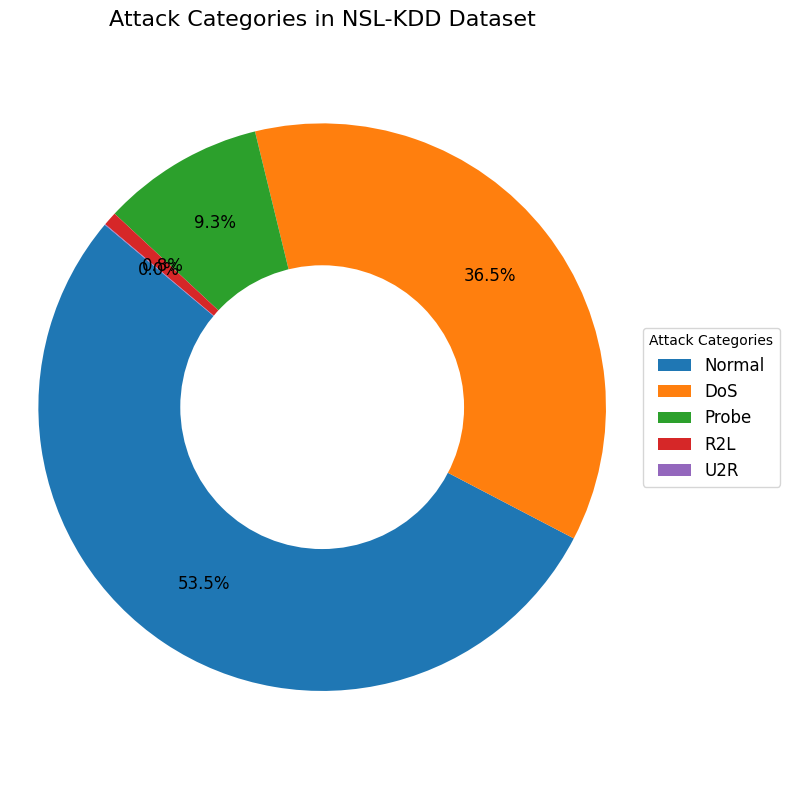

In [36]:
df["attack_category"] = df["attack"].apply(map_attack)
import matplotlib.pyplot as plt
category_counts = df["attack_category"].value_counts()
plt.figure(figsize=(8, 8))
def autopct_format(values):
    def inner(pct):
        return ('%1.1f%%' % pct) if pct > 1 else ''
    return inner
category_counts = df["attack_category"].value_counts()
wedges, texts, autotexts = plt.pie(
    category_counts.values,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.75,
    textprops={'fontsize': 12}
)
centre_circle = plt.Circle((0,0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)
plt.legend(
    wedges,
    category_counts.index,
    title="Attack Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12)
plt.title("Attack Categories in NSL-KDD Dataset", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


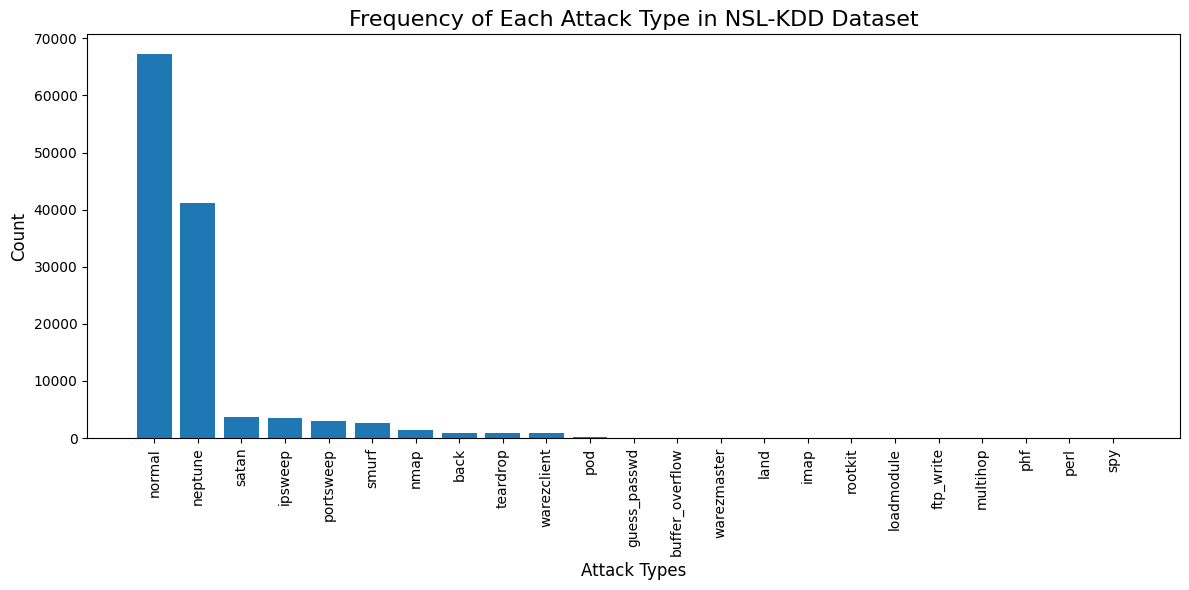

In [26]:
import matplotlib.pyplot as plt
attack_counts = df["attack"].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(attack_counts.index, attack_counts.values)
plt.xlabel("Attack Types", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Frequency of Each Attack Type in NSL-KDD Dataset", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


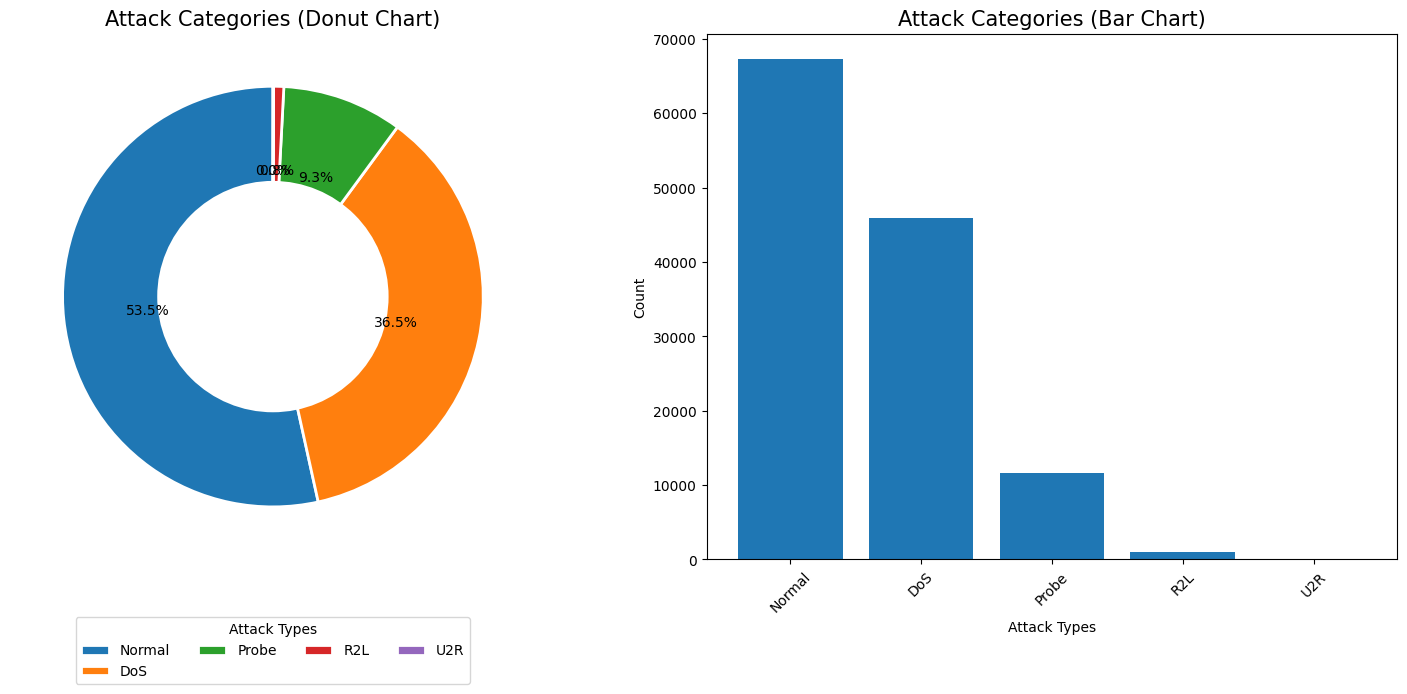

In [43]:
import matplotlib.pyplot as plt
attack_counts = df["attack_category"].value_counts()
labels = attack_counts.index
sizes = attack_counts.values
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
wedges, texts, autotexts = ax[0].pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10},
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'}
)
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
ax[0].add_artist(centre_circle)
ax[0].set_title("Attack Categories (Donut Chart)", fontsize=15)
ax[0].legend(
    wedges,
    labels,
    title="Attack Types",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.25),
    ncol=4
)
ax[1].bar(labels, sizes)
ax[1].set_title("Attack Categories (Bar Chart)", fontsize=15)
ax[1].set_xlabel("Attack Types")
ax[1].set_ylabel("Count")
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [51]:
from sklearn.preprocessing import LabelEncoder
print("Before Encoding:")
print(df[['protocol_type','service','flag']].head())
encoder = LabelEncoder()
df['protocol_type'] = encoder.fit_transform(df['protocol_type'])
df['service'] = encoder.fit_transform(df['service'])
df['flag'] = encoder.fit_transform(df['flag'])
print("\nAfter Label Encoding:")
print(df[['protocol_type','service','flag']].head())


Before Encoding:
  protocol_type  service flag
0           udp    other   SF
1           tcp  private   S0
2           tcp     http   SF
3           tcp     http   SF
4           tcp  private  REJ

After Label Encoding:
   protocol_type  service  flag
0              2       44     9
1              1       49     5
2              1       24     9
3              1       24     9
4              1       49     1


In [9]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=["label"])
y = df["label"]
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X[numeric_cols].head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110562,2.215267,0.770381,0.753259,-0.008273,-0.005156,-0.014047,-0.08888,-0.004587,-0.09243,...,0.732254,-1.032725,-1.157269,2.732958,2.366570,-0.288799,-0.642277,-0.627578,-0.386467,-0.374957
1,-0.110562,-0.127663,1.081187,-0.736913,-0.008299,-0.005156,-0.014047,-0.08888,-0.004587,-0.09243,...,0.732254,-0.806700,-0.934520,-0.175567,-0.479073,-0.288799,1.602259,1.612315,-0.386467,-0.374957
2,-0.110562,-0.127663,-0.472844,0.753259,-0.008258,-0.003515,-0.014047,-0.08888,-0.004587,-0.09243,...,-1.540121,1.263684,1.070220,-0.439979,-0.382062,0.066492,-0.574941,-0.605179,-0.386467,-0.343535
3,-0.110562,-0.127663,-0.472844,0.753259,-0.008264,-0.005072,-0.014047,-0.08888,-0.004587,-0.09243,...,0.732254,1.263684,1.070220,-0.439979,-0.479073,-0.288799,-0.642277,-0.627578,-0.386467,-0.374957
4,-0.110562,-0.127663,1.081187,-2.227086,-0.008299,-0.005156,-0.014047,-0.08888,-0.004587,-0.09243,...,0.732254,-0.869987,-1.001345,-0.069803,-0.479073,-0.288799,-0.642277,-0.627578,2.883887,2.767303


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain/Test Split Complete!")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Train/Test Split Complete!
X_train: (60827, 42)
X_test: (15207, 42)
